In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
import ppscore as pps
import statsmodels.api as sm
import matplotlib.pyplot as plt
import feature_engine
import pygwalker as pyg
from datetime import timedelta
from datetime import datetime
from sklearn.impute import SimpleImputer
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import sklearn
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from feature_engine.imputation import MeanMedianImputer
import math
import joblib
import pickle
import ipywidgets
from IPython.display import display


In [3]:
excel_file_path = '../budgetusd.xlsx'
sheet_name = "Rooms Revenue"
df = pd.read_excel(excel_file_path, sheet_name=sheet_name)
# Load the Excel file into a pandas DataFrame


In [5]:
import pandas as pd
import math

# This function will remove decimal points
def round_up_numeric(value):
    if pd.notnull(value) and isinstance(value, (int, float)):
        return math.ceil(value * 100) / 100
    return value

# Load your DataFrame (assuming you've already loaded it)
# df = pd.read_excel('budgetusd.xlsx', sheet_name='Rooms Revenue', engine='openpyxl')

# Apply the 'round_up_numeric' function to all columns
df = df.applymap(round_up_numeric)

# Define replacements for multiple columns
column_replacements = {
    'Local Rainy Season': {"No": 0, "Medium": 1, "Yes": 2},
    'Seasonality': {"Low": 0, "Medium": 1, "High": 2}
}

# Map values in the specified columns
for col, replacements in column_replacements.items():
    df[col] = df[col].replace(replacements)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Now, you can run this entire cell to execute all the operations.


In [6]:
df

,Percentage Rooms Occ %,Holidays Local,Seasonality,Holidays North,Local Rainy Season,International Flights,Marketing,Average Room Rate,Number of Rooms,Rooms Revenue
Date,,,,,,,,,,
2023-10-01,0.00,0.0,0,0.0,2,1.0,10.00,70.0,9.0,0.00
2023-11-01,0.00,0.0,0,0.0,2,1.0,10.00,70.0,9.0,0.00
2023-12-01,0.00,0.0,0,0.0,2,1.0,10.00,70.0,9.0,0.00
2022-01-01,0.61,3.0,2,7.0,0,1.0,62.12,75.0,9.0,13136.89
2022-02-01,0.62,1.0,2,0.0,0,1.0,62.12,75.0,9.0,11430.53
2022-03-01,0.39,0.0,2,0.0,0,1.0,99.31,75.0,9.0,9742.63
2022-04-01,0.70,5.0,2,0.0,0,1.0,246.06,75.0,9.0,15043.81
2022-05-01,0.47,1.0,0,0.0,1,1.0,144.93,75.0,9.0,8546.17
2022-06-01,0.33,0.0,0,0.0,1,1.0,118.46,75.0,9.0,7171.42


In [3]:
# This function will remove decimal points

def round_up_numeric(value):
    if pd.notnull(value) and isinstance(value, (int, float)):
        return math.ceil(value * 100) / 100
    return value

df =  df.applymap(round_up_numeric)

In [4]:
# Define replacements for multiple columns
column_replacements = {
    'Local Rainy Season': {"No": 0, "Medium": 1, "Yes": 2},
    'Seasonality': {"Low": 0, "Medium": 1, "High": 2}
}

# Map values in the specified columns
for col, replacements in column_replacements.items():
    df[col] = df[col].replace(replacements)


In [5]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)


In [7]:
df.drop(columns=['Rooms Revenue'], inplace=True)


In [7]:
df

,Percentage Rooms Occ %,Holidays Local,Seasonality,Holidays North,Local Rainy Season,International Flights,Marketing,Average Room Rate,Number of Rooms
Date,,,,,,,,,
2023-10-01,0.00,0.0,0,0.0,2,1.0,10.00,70.0,9.0
2023-11-01,0.00,0.0,0,0.0,2,1.0,10.00,70.0,9.0
2023-12-01,0.00,0.0,0,0.0,2,1.0,10.00,70.0,9.0
2022-01-01,0.61,3.0,2,7.0,0,1.0,62.12,75.0,9.0
2022-02-01,0.62,1.0,2,0.0,0,1.0,62.12,75.0,9.0
2022-03-01,0.39,0.0,2,0.0,0,1.0,99.31,75.0,9.0
2022-04-01,0.70,5.0,2,0.0,0,1.0,246.06,75.0,9.0
2022-05-01,0.47,1.0,0,0.0,1,1.0,144.93,75.0,9.0
2022-06-01,0.33,0.0,0,0.0,1,1.0,118.46,75.0,9.0


/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


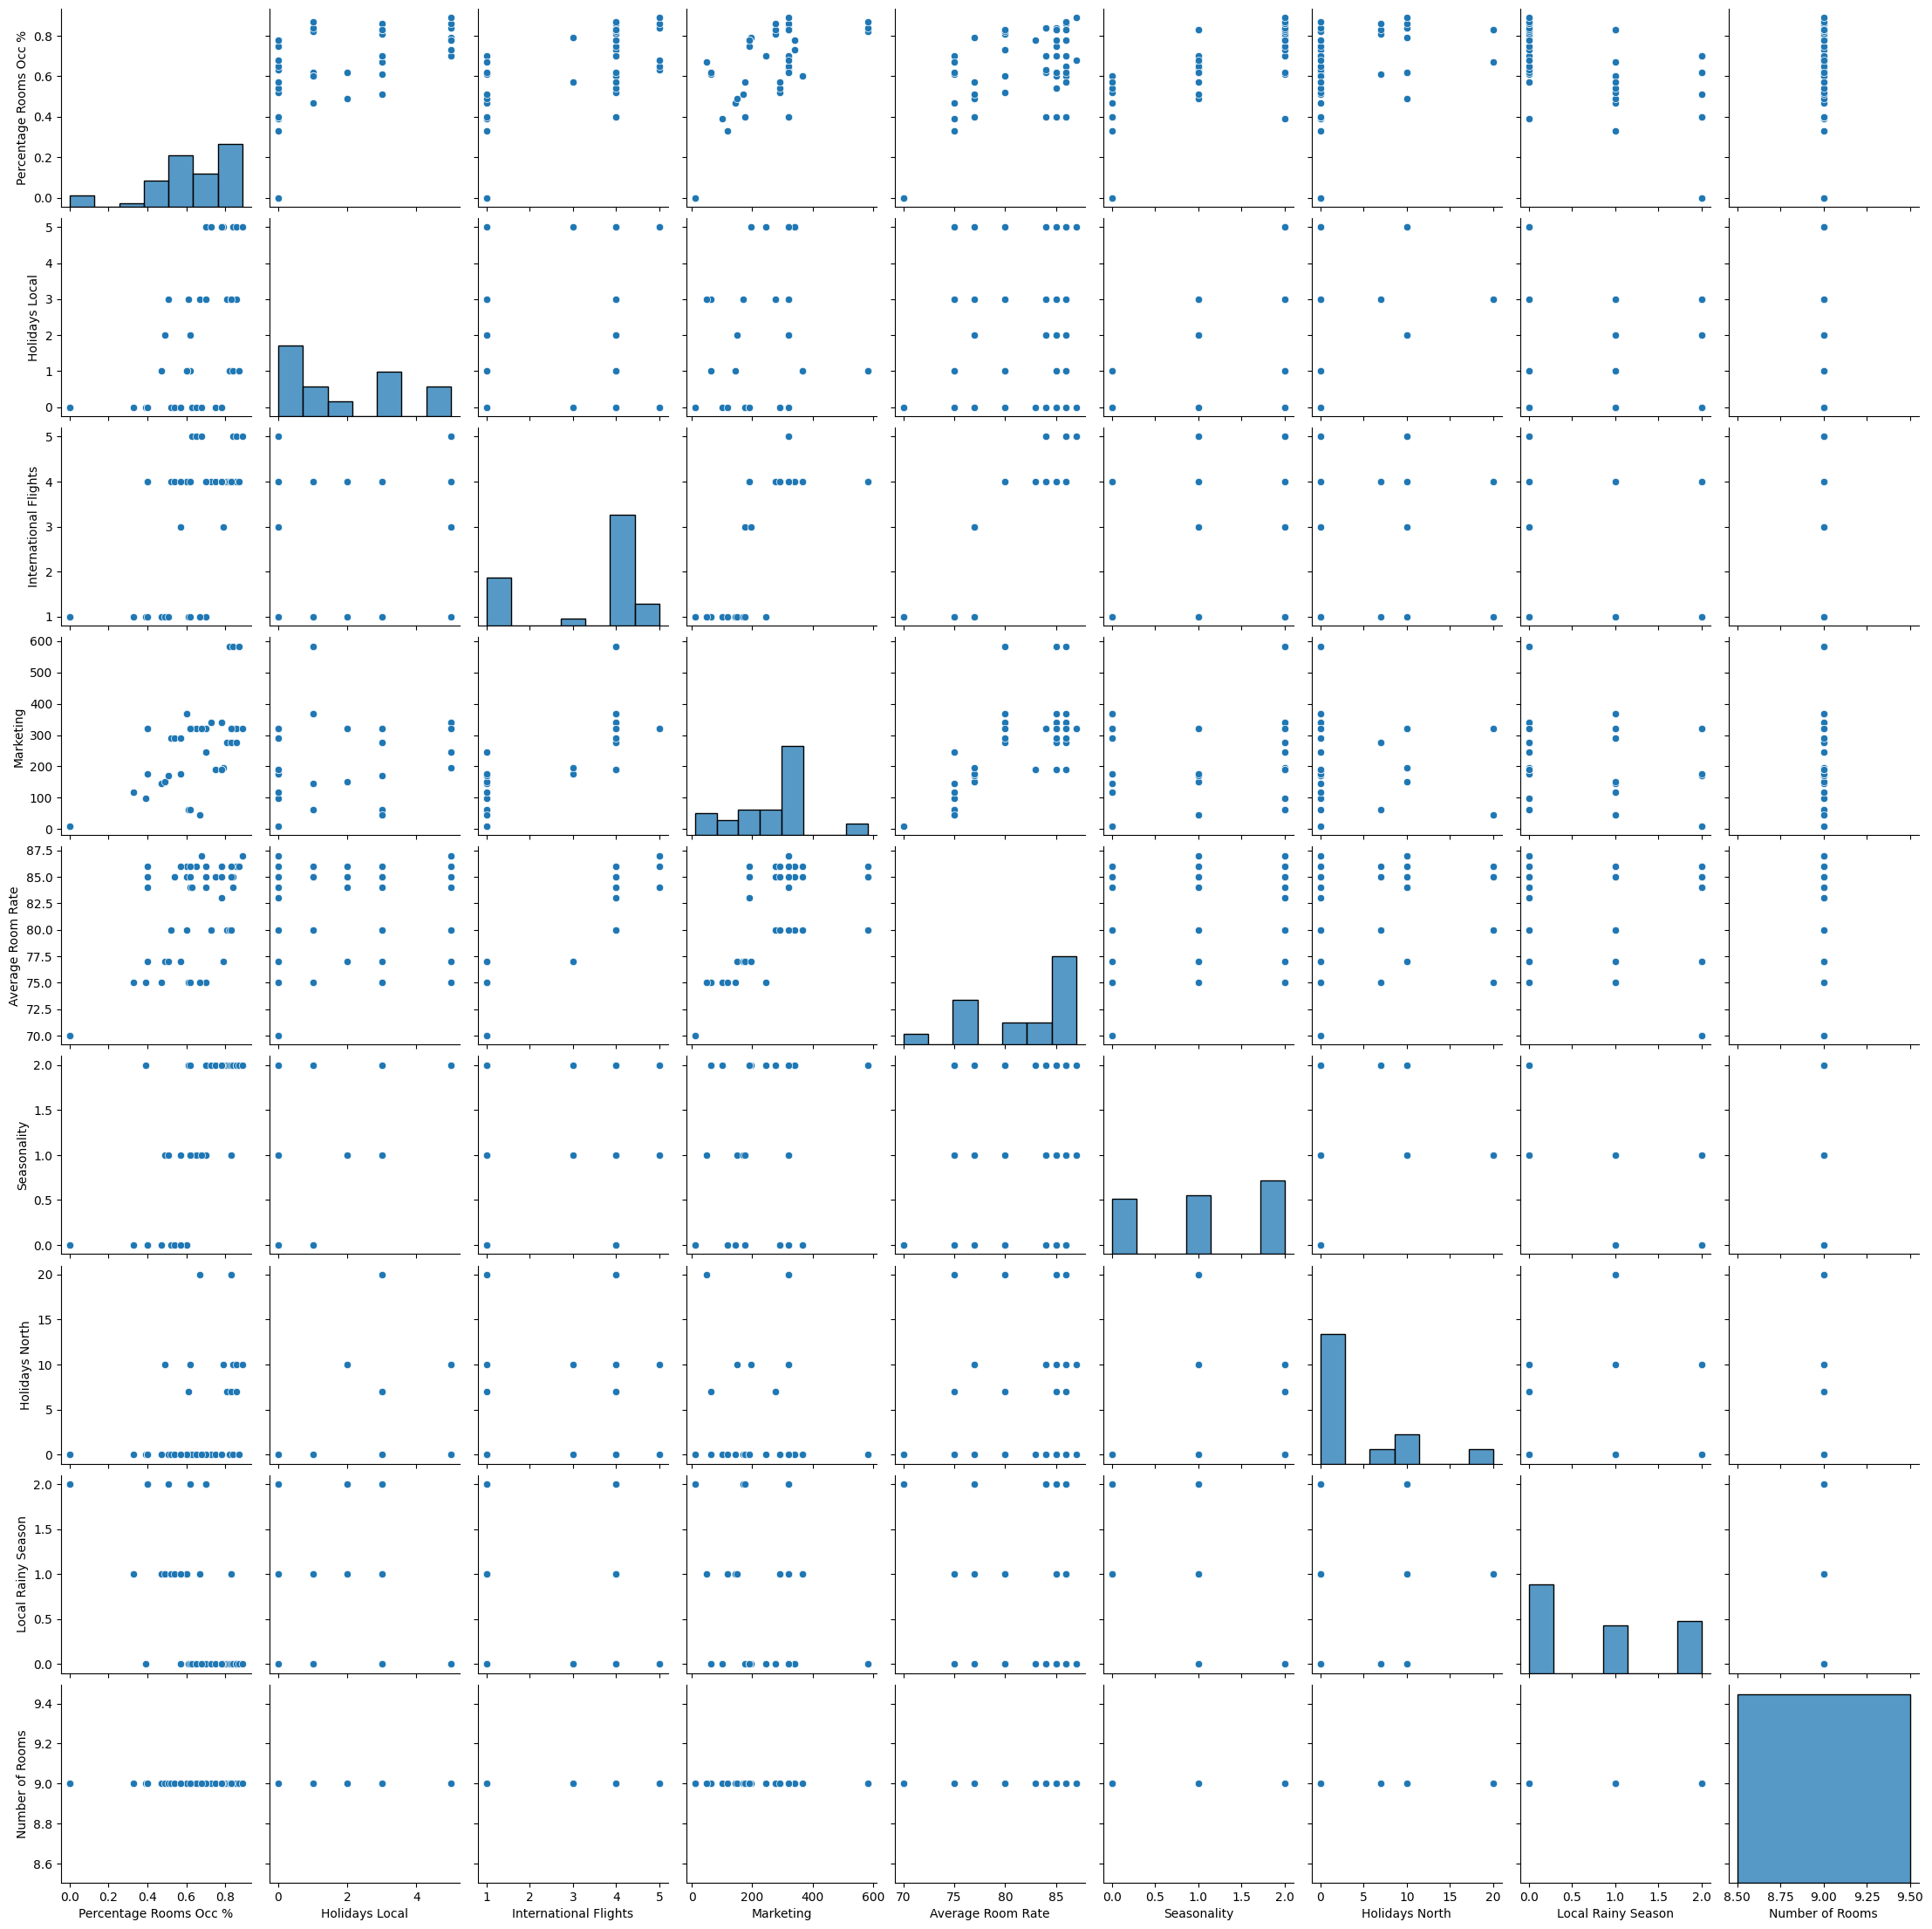

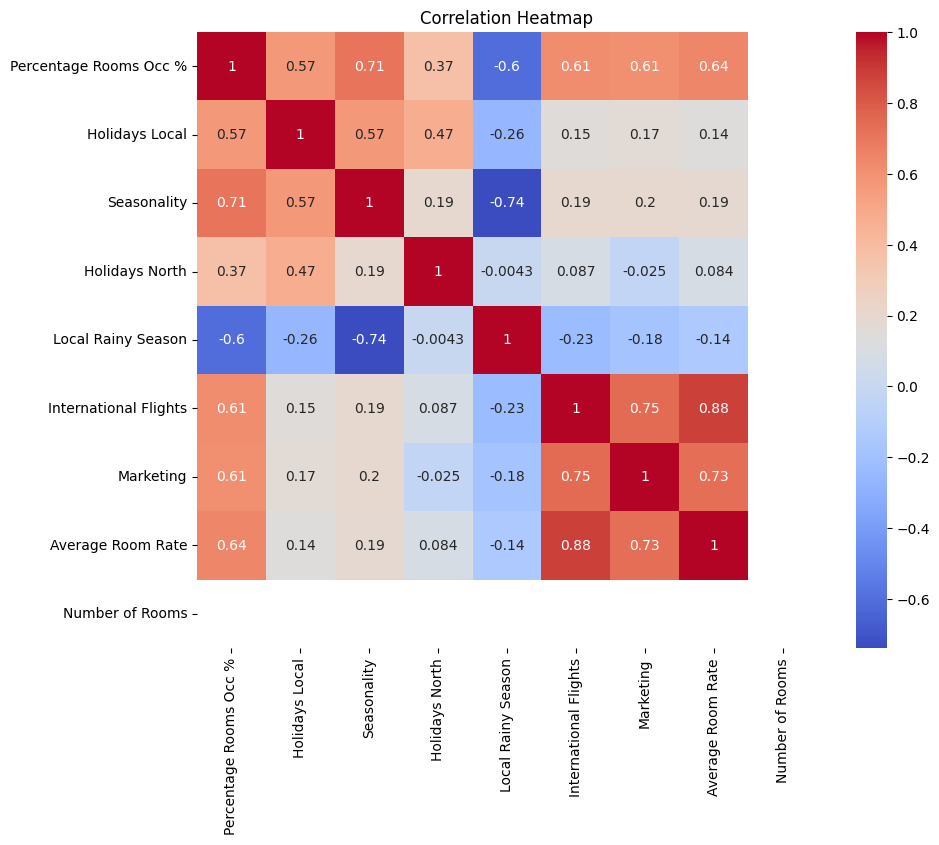

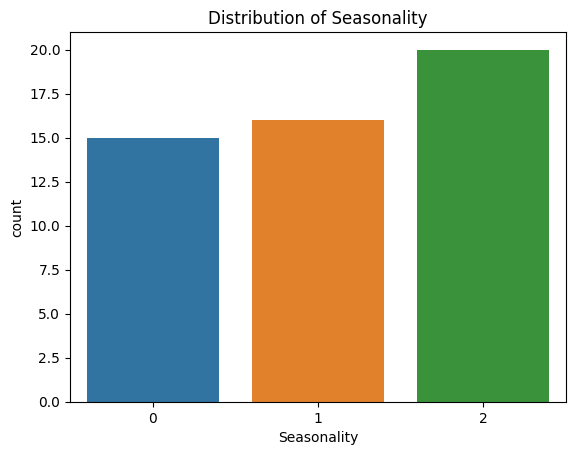

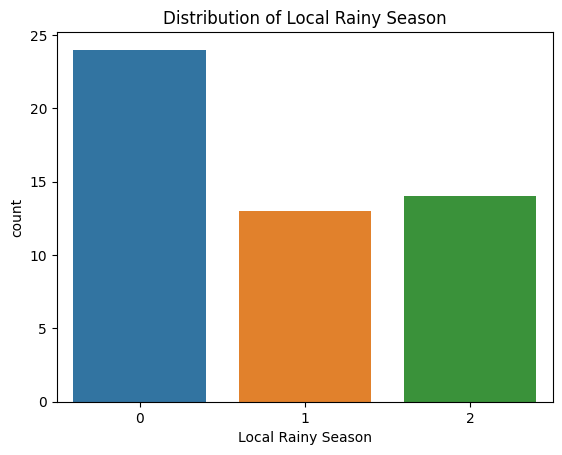

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plots for numerical variables 	
sns.pairplot(df, vars=['Percentage Rooms Occ %', 'Holidays Local', 'International Flights', 'Marketing', 'Average Room Rate', 
'Seasonality', 'Holidays North', 'Local Rainy Season', 'Number of Rooms'])
plt.show()

# Heatmap for numerical variable correlations
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Bar plots for categorical variables
categorical_cols = ['Seasonality', 'Local Rainy Season']
for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.show()


### Split training and test sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop(['Percentage Rooms Occ %'], axis=1),
                                        df['Percentage Rooms Occ %'],
                                        test_size=0.2,
                                        random_state=(101))
print("* Train set:", X_train.shape, y_train.shape,"\n* Test set:", X_test.shape, y_test.shape)         



* Train set: (40, 8) (40,) 
* Test set: (11, 8) (11,)


In [10]:
# ML Algorithms 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

def pipeline_random_forest_reg():
    pipeline = Pipeline([
        ("feature_scaling", StandardScaler()),
        ("feature_selection", SelectFromModel(RandomForestRegressor(random_state=101))),
        ("model", RandomForestRegressor(random_state=101)),
])

    return pipeline
pipeline_random_forest_reg()

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=101))),
                ('model', RandomForestRegressor(random_state=101))])

In [11]:
pipeline = pipeline_random_forest_reg()
pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=101))),
                ('model', RandomForestRegressor(random_state=101))])

In [12]:
def feature_importance_tree_based_models(model, columns):
    """ Gets the mode, and the columns used to train the model
        we use the model.feature_importanes_ and columns to make a DataFrame that shows 
        the importance of each feature and then we print the features name and its relative 
        importance order, followed by a barplot indicating the importance
        """ 
    # Create DataFrame to display feature importance
    df_feature_importance = pd.DataFrame(data={
        'Features': columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    best_features = df_feature_importance['Features'].to_list()

    # Print the most important features and plot the feature importance
    print(f"* These are the {len(best_features)} most important features in descending order. The model was trained on them:")
    print(df_feature_importance['Features'].to_list())

    df_feature_importance.plot(kind='bar', x='Features', y='Importance')
    plt.show()

* These are the 3 most important features in descending order. The model was trained on them:
['Marketing', 'Seasonality', 'Average Room Rate']


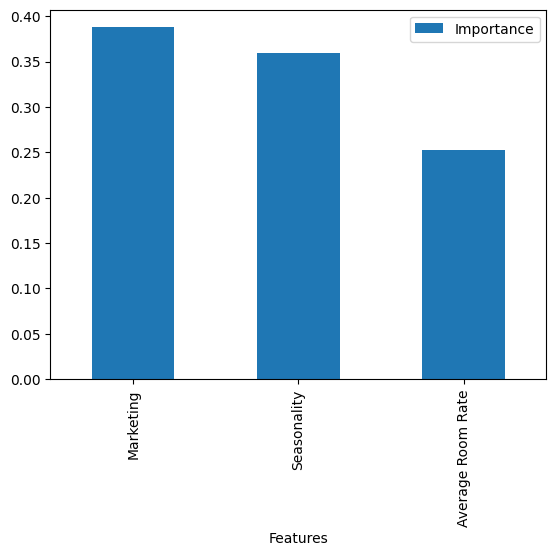

In [13]:
feature_importance_tree_based_models(model = pipeline['model'],
                                     columns = X_train.columns[pipeline['feature_selection'].get_support()])

In [14]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def regression_performance(X_train, y_train, X_test, y_test, pipeline):
    print("Model Evaluation")
    print("* Train Set")
    regression_evaluation(X_train, y_train, pipeline)
    print("* Test Set")
    regression_evaluation(X_test, y_test, pipeline)

def regression_evaluation(X, y, pipeline):
    prediction = pipeline.predict(X)
    print('R2 Score:', r2_score(y, prediction).round(3))
    print('Mean Absolute Error:', mean_absolute_error(y, prediction).round(3))
    print('Mean Squared Error:', mean_squared_error(y, prediction).round(3))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, prediction)).round(3))
    print("\n")

def regression_evaluation_plots(X_train, y_train, X_test, y_test, pipeline, alpha_scatter=0.5):
    pred_train = pipeline.predict(X_train)
    pred_test = pipeline.predict(X_test)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    sns.scatterplot(x=y_train, y=pred_train, alpha=alpha_scatter, ax=axes[0])
    sns.lineplot(x=y_train, y=y_train, color='red', ax=axes[0])
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    sns.scatterplot(x=y_train, y=pred_train, alpha=alpha_scatter, ax=axes[0])
    sns.lineplot(x=y_train, y=y_train, color='red', ax=axes[0])
    axes[0].set_xlabel("Actual")
    axes[0].set_ylabel("Predictions")
    axes[0].set_title("Train Set")
    
    sns.scatterplot(x=y_test, y=pred_test, alpha=alpha_scatter, ax=axes[1])
    sns.lineplot(x=y_test, y=y_test, color='red', ax=axes[1])
    axes[1].set_xlabel("Actual")
    axes[1].set_ylabel("Predictions")
    axes[1].set_title("Test Set")
    
    plt.show()


Model Evaluation
* Train Set
R2 Score: 0.953
Mean Absolute Error: 0.035
Mean Squared Error: 0.002
Root Mean Squared Error: 0.045


* Test Set
R2 Score: 0.868
Mean Absolute Error: 0.073
Mean Squared Error: 0.007
Root Mean Squared Error: 0.085




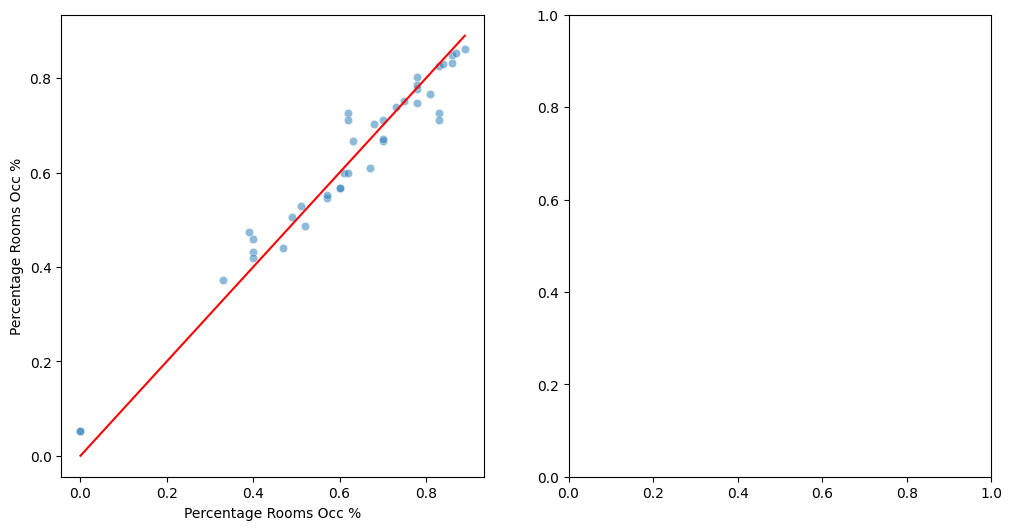

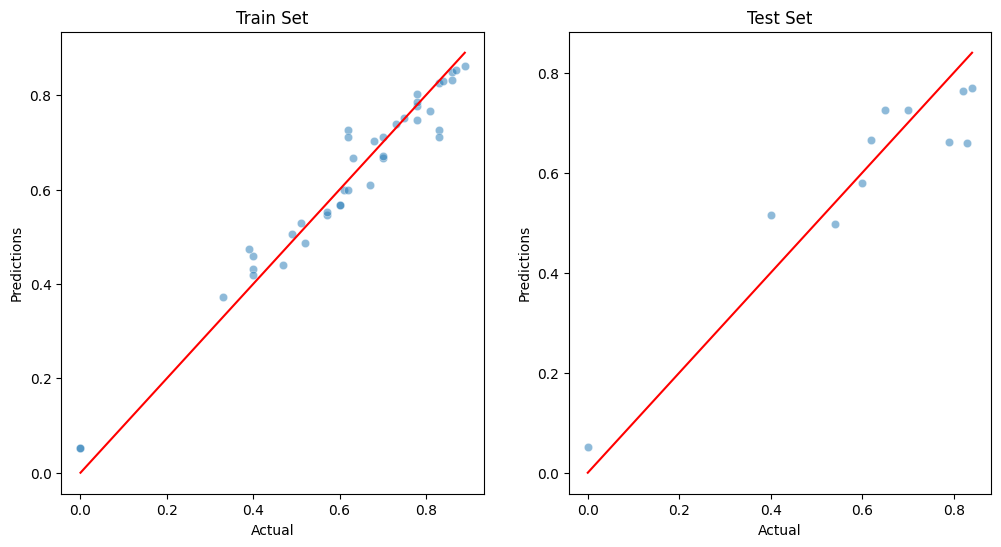

In [15]:
regression_performance(X_train, y_train, X_test, y_test, pipeline)
regression_evaluation_plots(X_train, y_train, X_test, y_test, pipeline, alpha_scatter=0.5)

#### Save code

In [17]:
model = 'occupancy_model.pkl'
joblib.dump(pipeline, model)

['occupancy_model.pkl']

In [18]:
loaded_model = joblib.load('occupancy_model.pkl')


### Predictive test

In [24]:
# Create a new DataFrame with the features in the correct order
new_data = pd.DataFrame({
    'Holidays Local': [0],
    'Seasonality': [0],  
    'Holidays North': [0],
    'Local Rainy Season': [0],
    'International Flights': [0],
    'Marketing': [0],  
    'Average Room Rate': [0],
    'Number of Rooms': [0]
})

# Use the model to make predictions
predicted_occupancy = loaded_model.predict(new_data)

# Print the predicted occupancy
print(f"Predicted Percentage Rooms Occupancy %: {predicted_occupancy[0]:.2f}%")

# Example predicted occupancy percentage
number_of_rooms = 9  # Example number of rooms
number_of_days = 30  # Example number of days for a monthly prediction
room_rate = 86  # Example room rate per day
room_revenue = (predicted_occupancy * number_of_rooms * number_of_days * room_rate)
print(f"Predicted Rooms Revenue: {room_revenue}$")



Predicted Percentage Rooms Occupancy %: 0.05%
Predicted Rooms Revenue: [1194.669]$


In [25]:
X_train.columns[pipeline['feature_selection'].get_support()]

Index(['Seasonality', 'Marketing', 'Average Room Rate'], dtype='object')

In [20]:
# Example predicted occupancy percentage
number_of_rooms = 9  # Example number of rooms
number_of_days = 30  # Example number of days for a monthly prediction
room_rate = 86  # Example room rate per day
room_revenue = (predicted_occupancy * number_of_rooms * number_of_days * room_rate)
room_revenue


array([20129.418])